<a href="https://colab.research.google.com/github/RehabEmam228/Bertlesmann-challenge/blob/master/face_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

# Using a Haar Cascade classifier

In [67]:
import os
import urllib.request

# Getting the image and the Haar Cascade
# urllib.request.urlretrieve('https://i.ibb.co/s2DYF3M/faces.jpg', './faces.jpg')
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml', 
                           'haarcascade_frontalface_default.xml')

os.listdir()

['.config',
 'faces.jpg',
 'haarcascade_frontalface_default.xml',
 'drive',
 'sample_data']

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


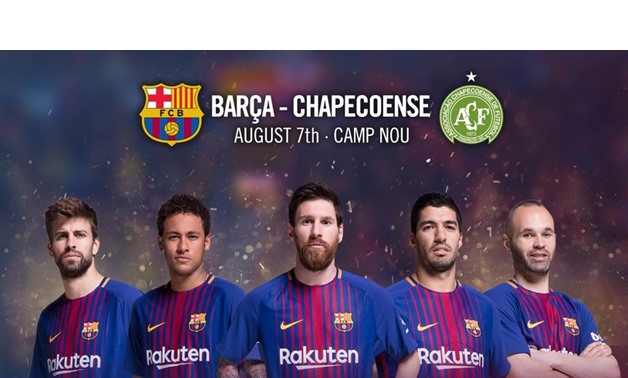

In [224]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('/content/drive/My Drive/faces.jpg')
cv2_imshow(img)

# Steps are:
1. Detect the face(s)
2. Create a copy of the original image in order to "subtract" the face area from it
3. Iterate over the detected faces and blur the face area on the copied image
4. Cut out the face(s) from the original image
5. Cut out the background (what is not "face") from the original image
6. Merge the blurred faces with the original image

To use the cascade detector CascadeClassifier offers a method called detectMultiScale to which we need to pass:

*   the image we want to "scan"
*   the scale factor specifying how much the image size is reduced at each    image scale (scaleFactor).

*   the minimum number of neightbours specifying how many neighbors each candidate rectangle should have to retain it (minNeighbors).
*   The minimum object size (minSize).


In [0]:
faces = face_cascade.detectMultiScale(img, scaleFactor = 1.5, minNeighbors = 1, minSize=(10, 10))

In [226]:
faces

array([[294, 204,  45,  45],
       [417, 209,  45,  45],
       [516, 217,  45,  45],
       [283, 196,  68,  68],
       [405, 200,  68,  68],
       [ 49, 218,  45,  45],
       [161, 220,  45,  45],
       [505, 206,  68,  68],
       [ 37, 208,  68,  68],
       [149, 210,  68,  68]], dtype=int32)

In [0]:
tempImg = img.copy()
maskShape = (img.shape[0], img.shape[1], 1)
mask = np.full(maskShape, 0, dtype=np.uint8)

In [116]:
maskshape

(378, 628, 1)

In [0]:
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    
    # Get the center of the face rectangle
    x_center = x + (w/2).astype(int)
    y_center = y + (h/2).astype(int)
    
    # Blur the tempImg in the area [y:y+h, x:x+w] aka where the face is.
    tempImg[y:y+h, x:x+w] = cv2.blur(tempImg[y:y+h, x:x+w] ,(50, 50))
    
    # Draw a circle in the mask image 
    # corresponsing to where the faces are in the original image
    
    cv2.circle(tempImg ,(x_center, y_center), int(h / 2), (255, 0, 0))
    cv2.circle(mask , (int((x + x + w )/2), int((y + y + h)/2 )), int(h / 2), (255, 0, 0), -1)


# Using bitwise not and add operators 

In [0]:
mask_inv = cv2.bitwise_not(mask)
background_img = cv2.bitwise_and(img, img, mask = mask_inv)
foreground_img = cv2.bitwise_and(tempImg, tempImg, mask = mask)
newimage = cv2.add(background_img, foreground_img)



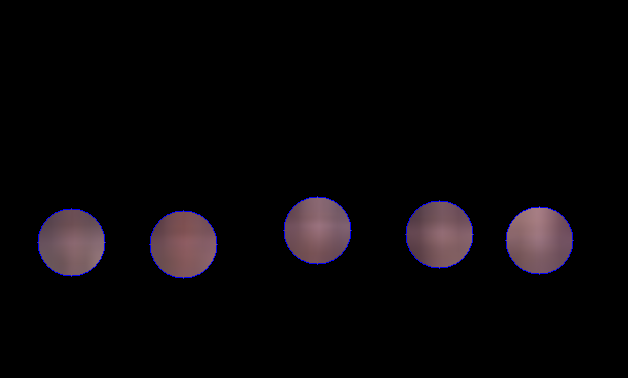

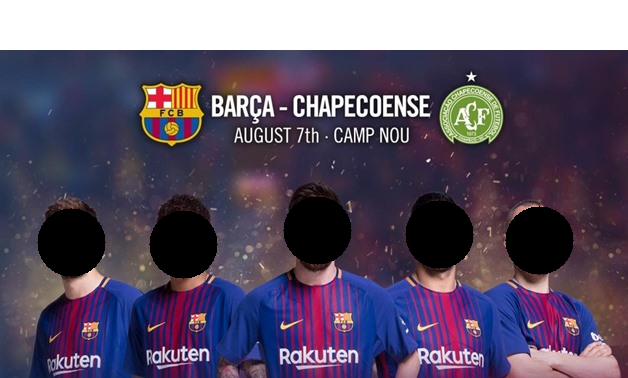

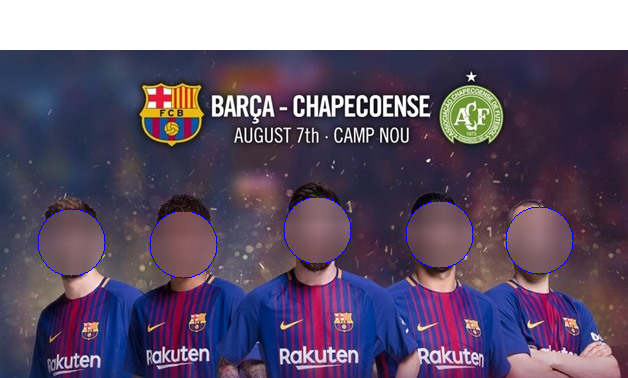

In [230]:
cv2_imshow(foreground_img)
cv2_imshow(background_img)
cv2_imshow(newimage)